[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/source/filtering_operators.ipynb)
[![Huggin Face Spaces](https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue.svg)](https://huggingface.co/spaces/kornia/kornia-image-filtering)

# Filtering Operators

In this tutorial we are going to learn how to apply blurring filters to images with `kornia.filters` components.

In [1]:
%%capture
!pip install kornia

In [2]:
%%capture
!wget https://github.com/kornia/data/raw/main/drslump.jpg

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

import torch
import torchvision
import kornia as K

/usr/local/lib/python3.7/dist-packages/kornia/augmentation/augmentation.py:1875: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  category=DeprecationWarning,


We use OpenCV to load an image to memory represented in a numpy.ndarray

In [4]:
img_bgr: np.ndarray = cv2.imread('drslump.jpg', cv2.IMREAD_COLOR)

Convert the numpy array to torch

In [5]:
x_bgr: torch.Tensor = K.utils.image_to_tensor(img_bgr)  # CxHxWx
x_bgr = x_bgr[None,...].float() / 255.

x_rgb: torch.Tensor = K.color.bgr_to_rgb(x_bgr)

In [6]:
def imshow(input: torch.Tensor):
    if input.shape != x_rgb.shape:
        input = K.geometry.resize(input, size=(x_rgb.shape[-2:]))
    out = torch.cat([x_rgb, input], dim=-1)
    out = torchvision.utils.make_grid(out, nrow=2, padding=5)
    out_np: np.ndarray = K.utils.tensor_to_image(out)
    plt.imshow(out_np)
    plt.axis('off')
    plt.show()

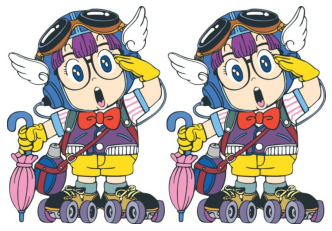

In [7]:
imshow(x_rgb)

## Box Blur

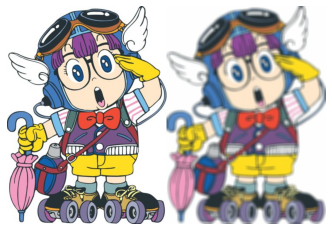

In [8]:
x_blur: torch.Tensor = K.filters.box_blur(x_rgb, (9, 9))
imshow(x_blur)

## Blur Pool

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


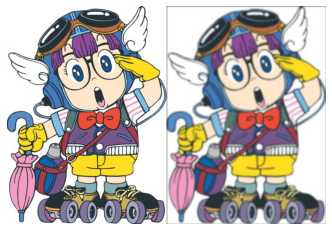

In [9]:
x_blur: torch.Tensor = K.filters.blur_pool2d(x_rgb, kernel_size=9)
imshow(x_blur)

## Gaussian Blur

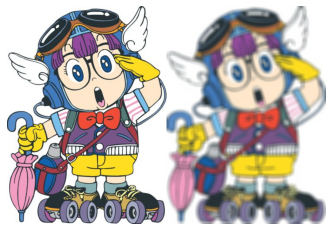

In [10]:
x_blur: torch.Tensor = K.filters.gaussian_blur2d(x_rgb, (11, 11), (11.0, 11.0))
imshow(x_blur)

## Max Pool

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


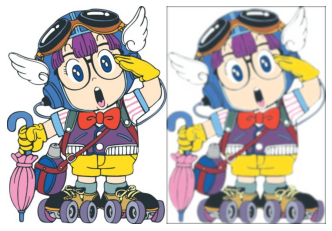

In [11]:
x_blur: torch.Tensor = K.filters.max_blur_pool2d(x_rgb, kernel_size=11)
imshow(x_blur)

## Median Blur

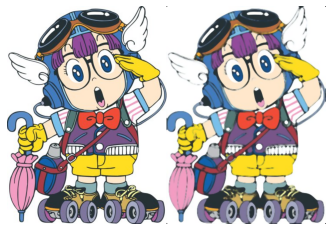

In [12]:
x_blur: torch.Tensor = K.filters.median_blur(x_rgb, (5, 5))
imshow(x_blur)

## Motion Blur

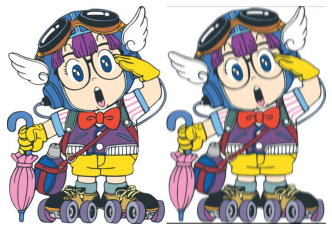

In [13]:
x_blur: torch.Tensor = K.filters.motion_blur(x_rgb, 9, 90., 1)
imshow(x_blur)